## Лабораторная 7
Датасет: Набор данных для анализа и прогнозирования сердечного приступа

In [2]:
import pandas as pd

df = pd.read_csv(".//static//csv//heart_2020_cleaned.csv")

df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

Создадим лингвистические переменные и произведем их настройку

Входные: BMI (индекс массы тела) и SleepTime (продолжительность сна)

Выходные: PhysicalHealth (физическое здоровье)

c:\Users\User\Desktop\aim\aimvenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


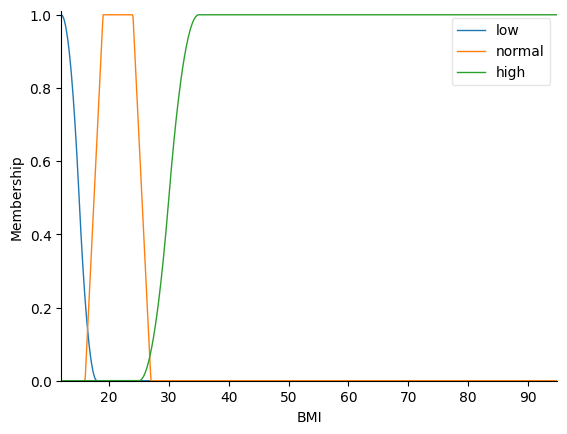

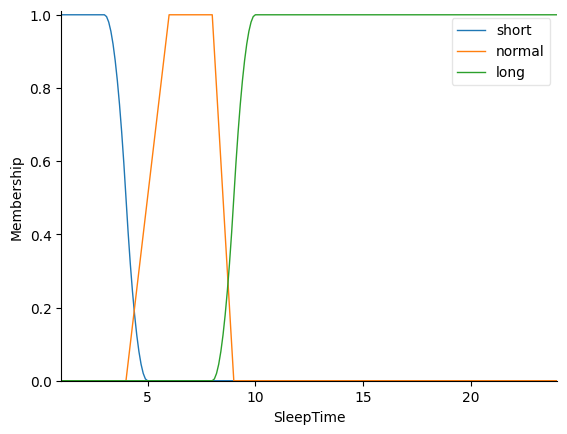

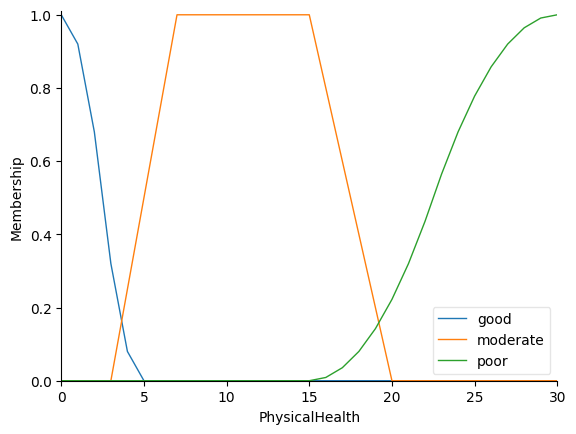

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

bmi = ctrl.Antecedent(np.arange(df["BMI"].min(), df["BMI"].max() + 0.1, 0.1), "BMI")
sleep_time = ctrl.Antecedent(np.arange(df["SleepTime"].min(), df["SleepTime"].max() + 0.1, 0.1), "SleepTime")
physical_health = ctrl.Consequent(np.arange(df["PhysicalHealth"].min(), df["PhysicalHealth"].max() + 1, 1), "PhysicalHealth")

bmi["low"] = fuzz.zmf(bmi.universe, 12, 18)
bmi["normal"] = fuzz.trapmf(bmi.universe, [16, 19, 24, 27])
bmi["high"] = fuzz.smf(bmi.universe, 25, 35)

sleep_time["short"] = fuzz.zmf(sleep_time.universe, 3, 5)
sleep_time["normal"] = fuzz.trapmf(sleep_time.universe, [4, 6, 8, 9])
sleep_time["long"] = fuzz.smf(sleep_time.universe, 8, 10)

physical_health["good"] = fuzz.zmf(physical_health.universe, 0, 5)
physical_health["moderate"] = fuzz.trapmf(physical_health.universe, [3, 7, 15, 20])
physical_health["poor"] = fuzz.smf(physical_health.universe, 15, 30)

bmi.view()
sleep_time.view()
physical_health.view()

Сформируем базу нечетких правил

(<Figure size 640x480 with 1 Axes>, <Axes: >)

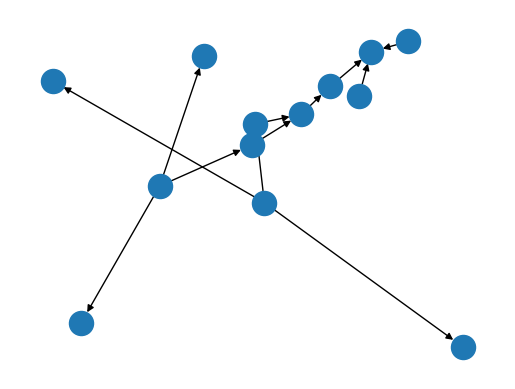

In [4]:
rule1 = ctrl.Rule(bmi["low"] & sleep_time["short"], physical_health["moderate"])
rule2 = ctrl.Rule(bmi["low"] & sleep_time["normal"], physical_health["good"])
rule3 = ctrl.Rule(bmi["low"] & sleep_time["long"], physical_health["good"])

rule4 = ctrl.Rule(bmi["normal"] & sleep_time["short"], physical_health["moderate"])
rule5 = ctrl.Rule(bmi["normal"] & sleep_time["normal"], physical_health["good"])
rule6 = ctrl.Rule(bmi["normal"] & sleep_time["long"], physical_health["good"])

rule7 = ctrl.Rule(bmi["high"] & sleep_time["short"], physical_health["poor"])
rule8 = ctrl.Rule(bmi["high"] & sleep_time["normal"], physical_health["moderate"])
rule9 = ctrl.Rule(bmi["high"] & sleep_time["long"], physical_health["moderate"])

rule1.view()

Создадим нечеткую систему и добавим созданные нечеткие правила в ее базу знаний

c:\Users\User\Desktop\aim\aimvenv\Lib\site-packages\skfuzzy\control\controlsystem.py:135: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


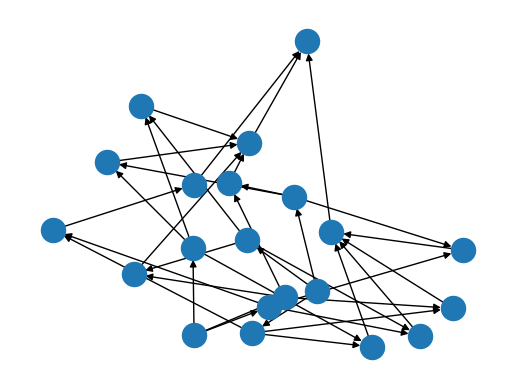

In [5]:
health_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9
    ]
)

health_simulation = ctrl.ControlSystemSimulation(health_ctrl)

health_ctrl.view()


Проверка расчета выходной переменной

In [6]:
health_simulation.input["BMI"] = 26
health_simulation.input["SleepTime"] = 7

health_simulation.compute()

health_simulation.print_state()

health_simulation.output["PhysicalHealth"]

 Antecedents 
Antecedent: BMI                     = 26
  - low                             : 0.0
  - normal                          : 0.3333333333333333
  - high                            : 0.02003199999999994
Antecedent: SleepTime               = 7
  - short                           : 0.0
  - normal                          : 1.0
  - long                            : 0.0

 Rules 
RULE #0:
  IF BMI[low] AND SleepTime[short] THEN PhysicalHealth[moderate]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - BMI[low]                                               : 0.0
  - SleepTime[short]                                       : 0.0
                             BMI[low] AND SleepTime[short] = 0.0
  Activation (THEN-clause):
                                  PhysicalHealth[moderate] : 0.0

RULE #1:
  IF BMI[low] AND SleepTime[normal] THEN PhysicalHealth[good]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-

np.float64(3.9601889413098417)

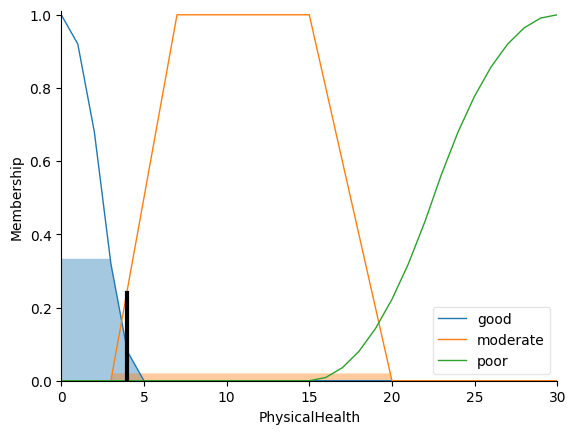

In [7]:
physical_health.view(sim=health_simulation)

Сравним результаты работы системы с реальными данными

In [8]:
def fuzzy_pred(row):
    health_simulation.input["BMI"] = row["BMI"]
    health_simulation.input["SleepTime"] = row["SleepTime"]
    health_simulation.compute()
    return health_simulation.output["PhysicalHealth"]

result = df.copy()

result["PhysicalHealth_pred"] = result.apply(fuzzy_pred, axis=1)

result.loc[:20, ["BMI", "SleepTime", "PhysicalHealth", "PhysicalHealth_pred"]]

BMI  SleepTime  PhysicalHealth  PhysicalHealth_pred
0   16.60        5.0             3.0             2.047325
1   20.34        7.0             0.0             1.490667
2   26.58        8.0            20.0             7.808681
3   24.21        6.0             0.0             1.505537
4   23.71        8.0            28.0             1.490667
5   28.87       12.0             6.0            11.427253
6   21.63        4.0            15.0            11.381356
7   31.64        9.0             5.0            11.381356
8   26.45        5.0             0.0             6.758991
9   40.69       10.0             0.0            11.280000
10  34.30       15.0            30.0            11.281767
11  28.71        5.0             0.0            11.432978
12  28.37        8.0             0.0            11.444414
13  28.15        7.0             7.0            11.451294
14  29.29        5.0             0.0            11.411281
15  29.18        6.0             1.0            11.415595
16  26.26       10.0             5.0             5.424223
17  22.59        8.0             0.0             1.490667
18  29.86        5.0             0.0            11.387517
19  18.13        8.0             0.0             1.616988
20  21.16        8.0             0.0             1.490667

Оценим результаты с помощью метрик регрессии

In [9]:
import math
from sklearn import metrics

rmetrics = {}
rmetrics["RMSE"] = math.sqrt(
    metrics.mean_squared_error(result["PhysicalHealth"], result["PhysicalHealth_pred"])
)
rmetrics["RMAE"] = math.sqrt(
    metrics.mean_absolute_error(result["PhysicalHealth"], result["PhysicalHealth_pred"])
)
rmetrics["R2"] = metrics.r2_score(
    result["PhysicalHealth"], result["PhysicalHealth_pred"]
)

rmetrics

{'RMSE': 9.902693515392837,
 'RMAE': 2.8027515579331546,
 'R2': -0.5512467826513943}

Как можно заметить, нечеткая система с такими переменными и настройками со своей задачей справляется плохо